In [1]:
# import libraries
import pandas as pd
from sklearn.metrics.pairwise import nan_euclidean_distances
import numpy as np

In [2]:
# import data
data=pd.read_csv("data.csv", sep=',')
data_original = data.copy()
data.head()

,Unnamed: 0,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,WindDirection
0,20010601,87.0,15.6,18.5,NaN,4.0,4.0,8.0,0.6946,-1.7101,-0.6946,84.0,North
1,20010602,82.0,NaN,NaN,NaN,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0,North
2,20010603,92.0,15.3,17.6,19.5,2.0,NaN,NaN,2.9544,NaN,0.5209,82.0,East
3,20010604,114.0,16.2,19.7,NaN,1.0,1.0,0.0,NaN,0.3473,-0.1736,92.0,North
4,20010605,94.0,NaN,20.5,20.4,NaN,NaN,NaN,-0.5000,-2.9544,-4.3301,114.0,West


In [3]:
# check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     112 non-null    int64  
 1   maxO3          96 non-null     float64
 2   T9             75 non-null     float64
 3   T12            79 non-null     float64
 4   T15            75 non-null     float64
 5   Ne9            78 non-null     float64
 6   Ne12           70 non-null     float64
 7   Ne15           80 non-null     float64
 8   Vx9            94 non-null     float64
 9   Vx12           102 non-null    float64
 10  Vx15           91 non-null     float64
 11  maxO3v         100 non-null    float64
 12  WindDirection  112 non-null    object 
dtypes: float64(11), int64(1), object(1)
memory usage: 11.5+ KB


In [4]:
#check no of null
data.isnull().sum(axis = 0)

Unnamed: 0        0
maxO3            16
T9               37
T12              33
T15              37
Ne9              34
Ne12             42
Ne15             32
Vx9              18
Vx12             10
Vx15             21
maxO3v           12
WindDirection     0
dtype: int64

In [5]:
# drop dup
data = data.drop_duplicates()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 111
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     112 non-null    int64  
 1   maxO3          96 non-null     float64
 2   T9             75 non-null     float64
 3   T12            79 non-null     float64
 4   T15            75 non-null     float64
 5   Ne9            78 non-null     float64
 6   Ne12           70 non-null     float64
 7   Ne15           80 non-null     float64
 8   Vx9            94 non-null     float64
 9   Vx12           102 non-null    float64
 10  Vx15           91 non-null     float64
 11  maxO3v         100 non-null    float64
 12  WindDirection  112 non-null    object 
dtypes: float64(11), int64(1), object(1)
memory usage: 12.2+ KB


In [8]:
# check unique values for WindDirection
data.WindDirection.unique()

array(['North', 'East', 'West', 'South'], dtype=object)

In [12]:
data2 = data.copy()

In [17]:
data["WindDirection"] = data.WindDirection.replace(to_replace=['North', 'East', 'West', 'South'], value=[1,2,3,4])

In [18]:
data

,Unnamed: 0,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,WindDirection
0,20010601,87.0,15.6,18.5,NaN,4.0,4.0,8.0,0.6946,-1.7101,-0.6946,84.0,1
1,20010602,82.0,NaN,NaN,NaN,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0,1
2,20010603,92.0,15.3,17.6,19.5,2.0,NaN,NaN,2.9544,NaN,0.5209,82.0,2
3,20010604,114.0,16.2,19.7,NaN,1.0,1.0,0.0,NaN,0.3473,-0.1736,92.0,1
4,20010605,94.0,NaN,20.5,20.4,NaN,NaN,NaN,-0.5000,-2.9544,-4.3301,114.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,20010925,NaN,13.3,NaN,17.8,3.0,5.0,NaN,0.0000,-1.0000,-1.2856,76.0,4
108,20010927,77.0,16.2,20.8,NaN,NaN,NaN,NaN,-0.6946,-2.0000,NaN,71.0,4
109,20010928,99.0,NaN,NaN,NaN,NaN,NaN,NaN,1.5000,0.8682,0.8682,NaN,4
110,20010929,83.0,NaN,NaN,NaN,NaN,5.0,3.0,-4.0000,-3.7588,-4.0000,99.0,3


In [19]:
# drop non irrelevant column
data = data.drop(columns=['Unnamed: 0'])
data

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,WindDirection
0,87.0,15.6,18.5,NaN,4.0,4.0,8.0,0.6946,-1.7101,-0.6946,84.0,1
1,82.0,NaN,NaN,NaN,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0,1
2,92.0,15.3,17.6,19.5,2.0,NaN,NaN,2.9544,NaN,0.5209,82.0,2
3,114.0,16.2,19.7,NaN,1.0,1.0,0.0,NaN,0.3473,-0.1736,92.0,1
4,94.0,NaN,20.5,20.4,NaN,NaN,NaN,-0.5000,-2.9544,-4.3301,114.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
107,NaN,13.3,NaN,17.8,3.0,5.0,NaN,0.0000,-1.0000,-1.2856,76.0,4
108,77.0,16.2,20.8,NaN,NaN,NaN,NaN,-0.6946,-2.0000,NaN,71.0,4
109,99.0,NaN,NaN,NaN,NaN,NaN,NaN,1.5000,0.8682,0.8682,NaN,4
110,83.0,NaN,NaN,NaN,NaN,5.0,3.0,-4.0000,-3.7588,-4.0000,99.0,3


In [20]:
# make a copy of data before imputing
orginal_data = data.copy()
orginal_data

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,WindDirection
0,87.0,15.6,18.5,NaN,4.0,4.0,8.0,0.6946,-1.7101,-0.6946,84.0,1
1,82.0,NaN,NaN,NaN,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0,1
2,92.0,15.3,17.6,19.5,2.0,NaN,NaN,2.9544,NaN,0.5209,82.0,2
3,114.0,16.2,19.7,NaN,1.0,1.0,0.0,NaN,0.3473,-0.1736,92.0,1
4,94.0,NaN,20.5,20.4,NaN,NaN,NaN,-0.5000,-2.9544,-4.3301,114.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
107,NaN,13.3,NaN,17.8,3.0,5.0,NaN,0.0000,-1.0000,-1.2856,76.0,4
108,77.0,16.2,20.8,NaN,NaN,NaN,NaN,-0.6946,-2.0000,NaN,71.0,4
109,99.0,NaN,NaN,NaN,NaN,NaN,NaN,1.5000,0.8682,0.8682,NaN,4
110,83.0,NaN,NaN,NaN,NaN,5.0,3.0,-4.0000,-3.7588,-4.0000,99.0,3


In [21]:
# check euclidean distance
ed = pd.DataFrame(nan_euclidean_distances(data, data))
ed

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,0.000000,9.852656,7.888359,32.520228,40.845190,17.082449,13.572719,18.779822,17.238298,31.784724,...,26.975709,20.424293,21.001460,20.067546,15.186279,11.065215,22.129383,19.762913,21.499841,20.668564
1,9.852656,0.000000,20.023021,41.657308,42.297331,10.225785,10.959429,16.572332,26.411349,37.293768,...,28.937370,28.310825,28.232709,24.899760,12.794083,16.802496,27.153646,29.825589,15.787676,17.699896
2,7.888359,20.023021,0.000000,31.848812,42.902249,24.038716,19.926190,25.322111,12.703707,30.254852,...,32.830942,16.212303,18.900527,21.302542,21.926745,10.131867,27.362938,12.872750,32.488849,28.382350
3,32.520228,41.657308,31.848812,0.000000,42.820970,41.678141,44.616617,41.887748,21.952061,18.075455,...,56.974189,33.360231,20.054845,29.809445,54.069510,22.543739,60.427143,26.571979,42.838595,53.279530
4,40.845190,42.297331,42.902249,42.820970,0.000000,30.844954,46.659592,26.771437,43.949883,23.531932,...,66.811375,58.051269,26.997539,25.363187,24.800303,54.131297,65.422301,13.111942,26.795747,51.472044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,11.065215,16.802496,10.131867,22.543739,54.131297,25.207882,10.850489,26.976100,7.881554,32.203791,...,14.985815,11.051861,26.716849,31.063668,2.264932,0.000000,9.151061,5.580061,33.495640,12.180058
108,22.129383,27.153646,27.362938,60.427143,65.422301,31.414897,14.733717,37.286085,33.416940,59.167898,...,12.625821,29.066999,44.270260,46.020734,6.573101,9.151061,0.000000,38.615133,44.766569,19.950336
109,19.762913,29.825589,12.872750,26.571979,13.111942,34.452118,33.368794,31.748802,8.729067,14.129333,...,44.653397,8.889988,9.217663,16.425269,36.016487,5.580061,38.615133,0.000000,28.242882,51.039627
110,21.499841,15.787676,32.488849,42.838595,26.795747,9.990648,25.846778,9.276498,35.852624,33.558156,...,44.656794,40.443807,25.714362,21.103812,13.819316,33.495640,44.766569,28.242882,0.000000,29.979378


In [22]:
# replace 0 to nan so that when we sort the distance later we can ignore the same index
ed = ed.replace(0, np.nan)
ed

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,NaN,9.852656,7.888359,32.520228,40.845190,17.082449,13.572719,18.779822,17.238298,31.784724,...,26.975709,20.424293,21.001460,20.067546,15.186279,11.065215,22.129383,19.762913,21.499841,20.668564
1,9.852656,NaN,20.023021,41.657308,42.297331,10.225785,10.959429,16.572332,26.411349,37.293768,...,28.937370,28.310825,28.232709,24.899760,12.794083,16.802496,27.153646,29.825589,15.787676,17.699896
2,7.888359,20.023021,NaN,31.848812,42.902249,24.038716,19.926190,25.322111,12.703707,30.254852,...,32.830942,16.212303,18.900527,21.302542,21.926745,10.131867,27.362938,12.872750,32.488849,28.382350
3,32.520228,41.657308,31.848812,NaN,42.820970,41.678141,44.616617,41.887748,21.952061,18.075455,...,56.974189,33.360231,20.054845,29.809445,54.069510,22.543739,60.427143,26.571979,42.838595,53.279530
4,40.845190,42.297331,42.902249,42.820970,NaN,30.844954,46.659592,26.771437,43.949883,23.531932,...,66.811375,58.051269,26.997539,25.363187,24.800303,54.131297,65.422301,13.111942,26.795747,51.472044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,11.065215,16.802496,10.131867,22.543739,54.131297,25.207882,10.850489,26.976100,7.881554,32.203791,...,14.985815,11.051861,26.716849,31.063668,2.264932,NaN,9.151061,5.580061,33.495640,12.180058
108,22.129383,27.153646,27.362938,60.427143,65.422301,31.414897,14.733717,37.286085,33.416940,59.167898,...,12.625821,29.066999,44.270260,46.020734,6.573101,9.151061,NaN,38.615133,44.766569,19.950336
109,19.762913,29.825589,12.872750,26.571979,13.111942,34.452118,33.368794,31.748802,8.729067,14.129333,...,44.653397,8.889988,9.217663,16.425269,36.016487,5.580061,38.615133,NaN,28.242882,51.039627
110,21.499841,15.787676,32.488849,42.838595,26.795747,9.990648,25.846778,9.276498,35.852624,33.558156,...,44.656794,40.443807,25.714362,21.103812,13.819316,33.495640,44.766569,28.242882,NaN,29.979378


In [23]:
# checking of the distance sorting for each row
for i in range(len(data.index)):
    sort_ed = ed.sort_values(i)
    print(f"row {i} = {sort_ed.index}")

row 0 = Int64Index([ 17,  15,   2,  50,  31,   1,  80, 107,  49,  24,
            ...
             19,  21,  57,  78,  54,  56,  79,  52,  55,   0],
           dtype='int64', length=112)
row 1 = Int64Index([23, 24, 87, 49,  0,  5, 80, 17,  6, 15,
            ...
            57, 53, 19, 78, 56, 54, 52, 79, 55,  1],
           dtype='int64', length=112)
row 2 = Int64Index([  0,  15,  17,  31, 107,  68,  50,   8, 109,  90,
            ...
             30,  57,  78,  54,  21,  56,  79,  52,  55,   2],
           dtype='int64', length=112)
row 3 = Int64Index([ 17,  32,  69,  33,  81,  80,  50,  18,   9,  24,
            ...
             54,  56,  30, 100,  52,  39,  57,  79,  55,   3],
           dtype='int64', length=112)
row 4 = Int64Index([ 17,  68,  83,  80, 109,  10,  16,  82,  49,  23,
            ...
             78,  91, 100,  56,  79,  52, 101,  40,  55,   4],
           dtype='int64', length=112)
row 5 = Int64Index([110,  36,   1,  84,  87,   7,  23, 106,  12,  49,
            ...

In [24]:
for i in range(len(data.index)): # for each row
    sort_ed = ed.sort_values(i) # sort the distance between row i and other rows
    for c in range(len(data.columns)): # for each column
        obj = data.iat[i,c] 
        if np.isnan(obj): # if it is a missing value
            # check if the closest index in data is not null
            for s in sort_ed.index:
                if np.isnan(data.iat[s,c]) == False:
                    # if so, replace the value to the value of the closest row
                    data.iat[i,c] = data.iat[s, c]
                    # stop the for loop if the null is replaced
                    break  

In [25]:
data #show imputed data

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,WindDirection
0,87.0,15.6,18.5,19.5,4.0,4.0,8.0,0.6946,-1.7101,-0.6946,84.0,1
1,82.0,19.7,22.9,24.8,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0,1
2,92.0,15.3,17.6,19.5,2.0,4.0,8.0,2.9544,-1.7101,0.5209,82.0,2
3,114.0,16.2,19.7,22.7,1.0,1.0,0.0,0.0000,0.3473,-0.1736,92.0,1
4,94.0,16.9,20.5,20.4,1.0,1.0,0.0,-0.5000,-2.9544,-4.3301,114.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
107,76.0,13.3,17.7,17.8,3.0,5.0,1.0,0.0000,-1.0000,-1.2856,76.0,4
108,77.0,16.2,20.8,24.6,4.0,5.0,6.0,-0.6946,-2.0000,-2.0000,71.0,4
109,99.0,16.8,18.2,22.0,8.0,8.0,6.0,1.5000,0.8682,0.8682,79.0,4
110,83.0,19.7,22.9,24.8,6.0,5.0,3.0,-4.0000,-3.7588,-4.0000,99.0,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7b73c3700>,
      dtype=object)

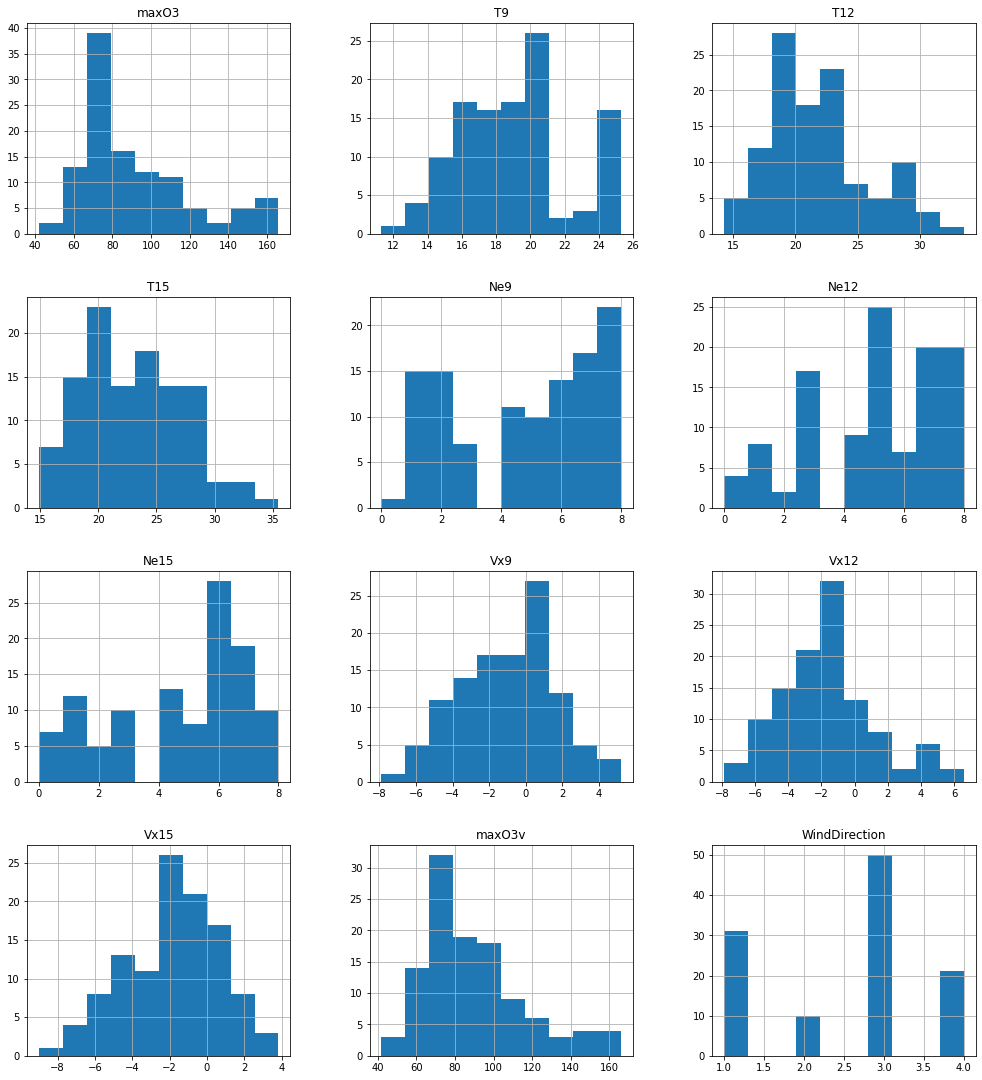

In [26]:
data.hist(figsize=(17,19))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7b6ea9ca0>,
      dtype=object)

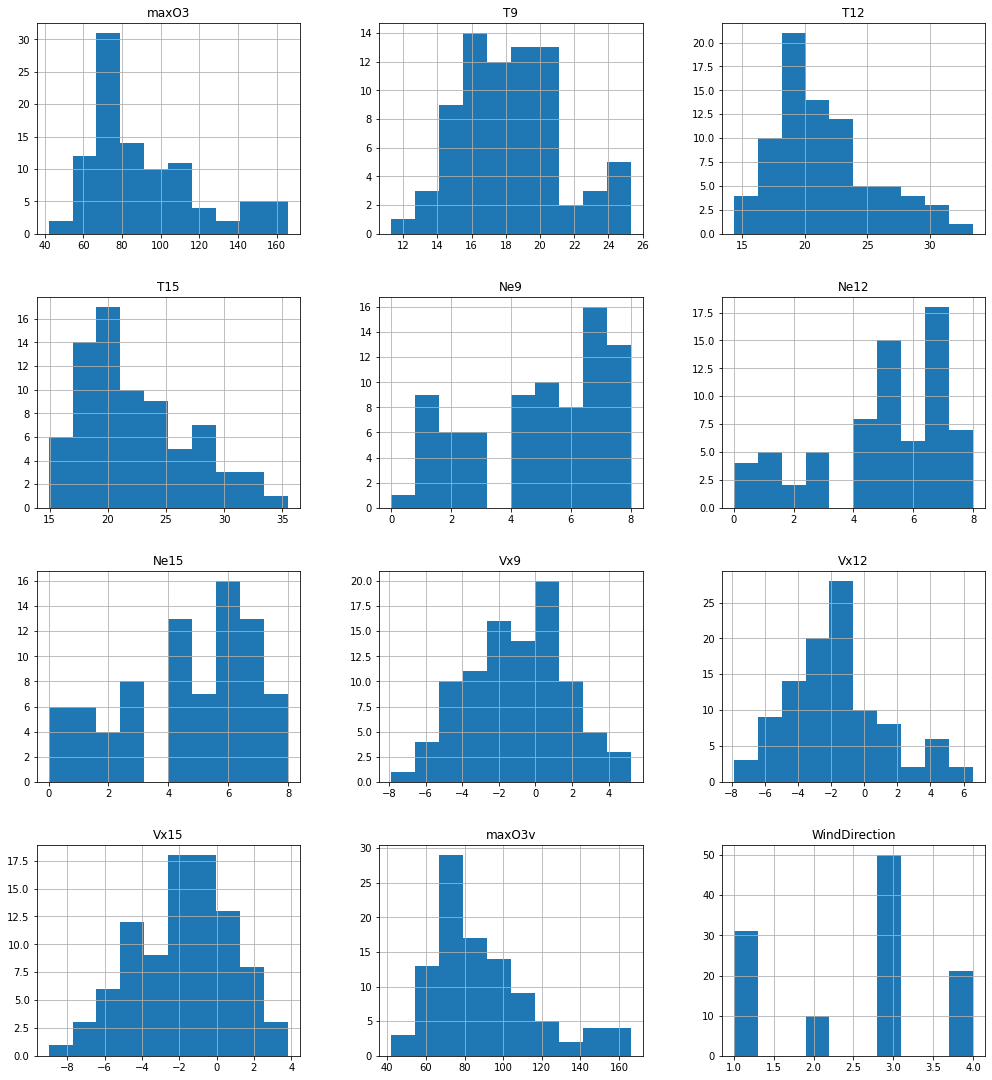

In [27]:
orginal_data.hist(figsize=(17,19))

In [28]:
import matplotlib.pyplot as plt

In [29]:
import seaborn as sns

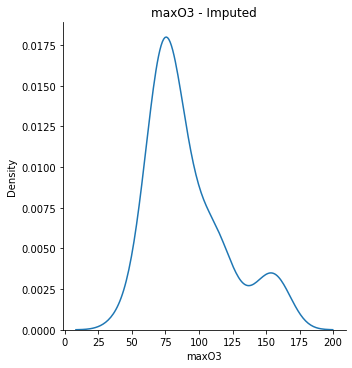

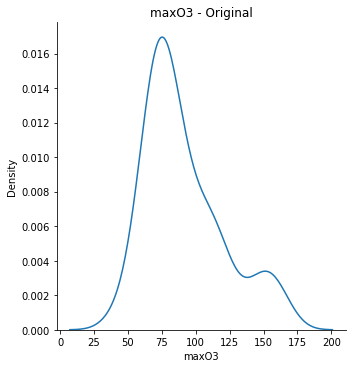

In [30]:
sns.displot(data, x="maxO3", kind="kde").set(title='maxO3 - Imputed')
sns.displot(orginal_data, x="maxO3", kind="kde").set(title='maxO3 - Original')
plt.show()

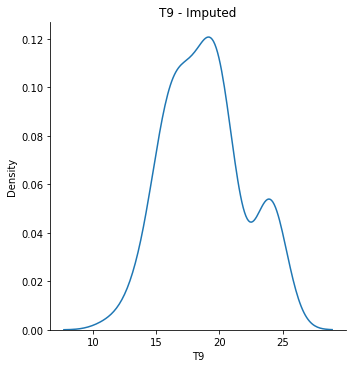

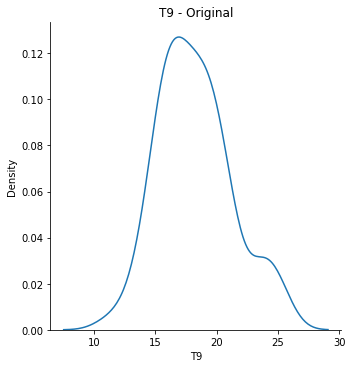

In [31]:
sns.displot(data, x="T9", kind="kde").set(title='T9 - Imputed')
sns.displot(orginal_data, x="T9", kind="kde").set(title='T9 - Original')
plt.show()

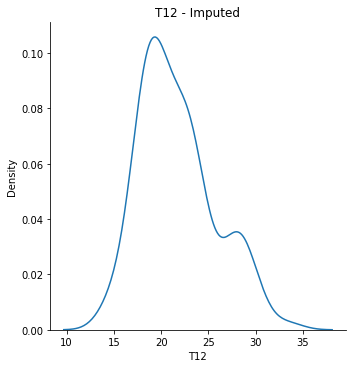

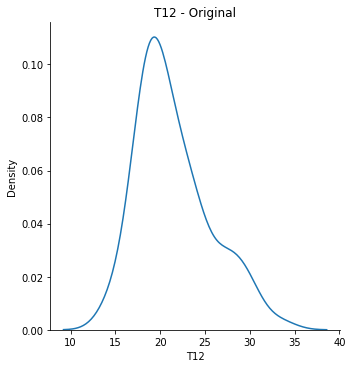

In [32]:
sns.displot(data, x="T12", kind="kde").set(title='T12 - Imputed')
sns.displot(orginal_data, x="T12", kind="kde").set(title='T12 - Original')
plt.show()

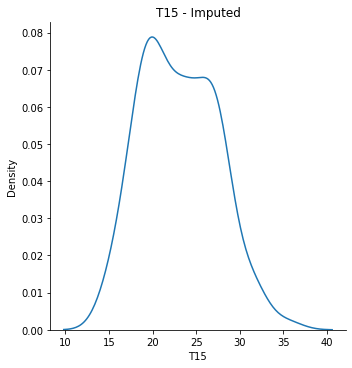

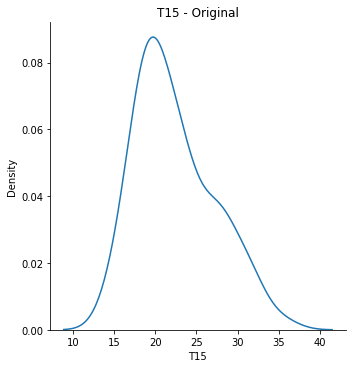

In [33]:
sns.displot(data, x="T15", kind="kde").set(title='T15 - Imputed')
sns.displot(orginal_data, x="T15", kind="kde").set(title='T15 - Original')
plt.show()

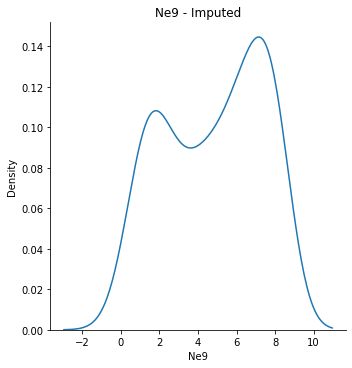

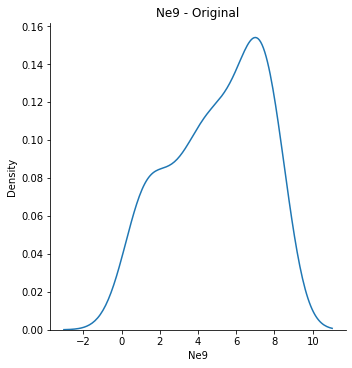

In [34]:
sns.displot(data, x="Ne9", kind="kde").set(title='Ne9 - Imputed')
sns.displot(orginal_data, x="Ne9", kind="kde").set(title='Ne9 - Original')
plt.show()

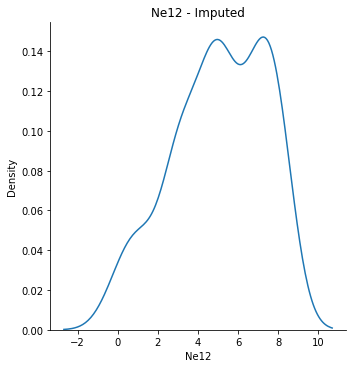

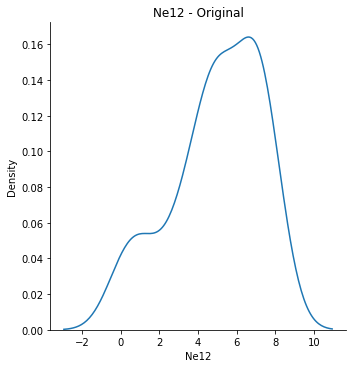

In [35]:
sns.displot(data, x="Ne12", kind="kde").set(title='Ne12 - Imputed')
sns.displot(orginal_data, x="Ne12", kind="kde").set(title='Ne12 - Original')
plt.show()

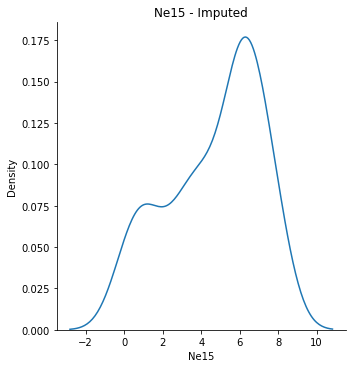

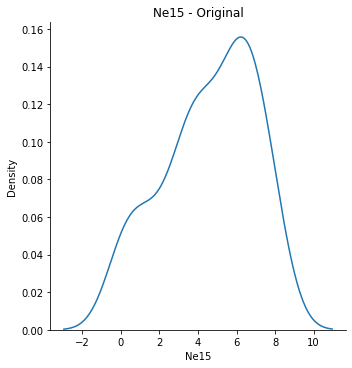

In [36]:
sns.displot(data, x="Ne15", kind="kde").set(title='Ne15 - Imputed')
sns.displot(orginal_data, x="Ne15", kind="kde").set(title='Ne15 - Original')
plt.show()

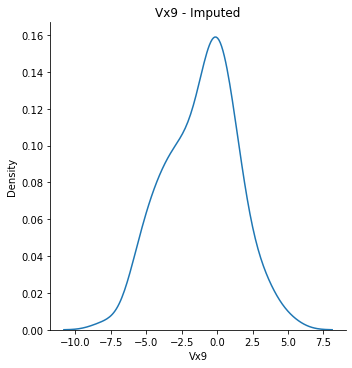

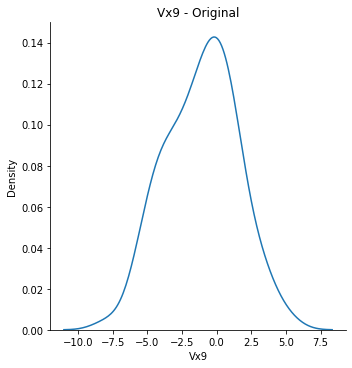

In [37]:
sns.displot(data, x="Vx9", kind="kde").set(title='Vx9 - Imputed')
sns.displot(orginal_data, x="Vx9", kind="kde").set(title='Vx9 - Original')
plt.show()

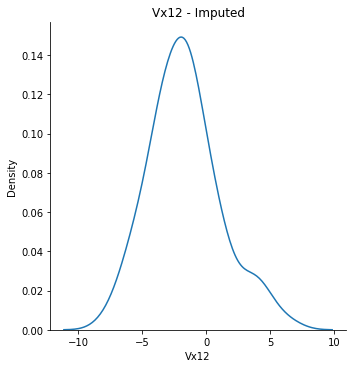

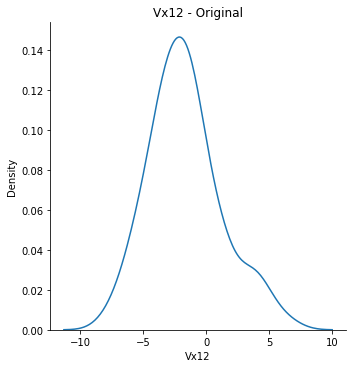

In [38]:
sns.displot(data, x="Vx12", kind="kde").set(title='Vx12 - Imputed')
sns.displot(orginal_data, x="Vx12", kind="kde").set(title='Vx12 - Original')
plt.show()

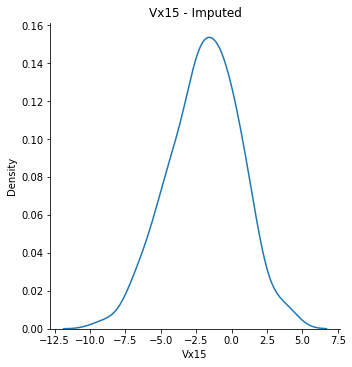

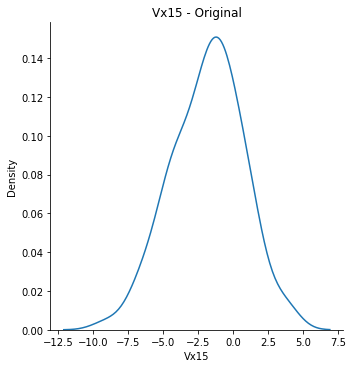

In [39]:
sns.displot(data, x="Vx15", kind="kde").set(title='Vx15 - Imputed')
sns.displot(orginal_data, x="Vx15", kind="kde").set(title='Vx15 - Original')
plt.show()

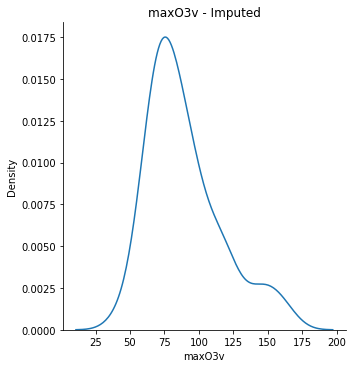

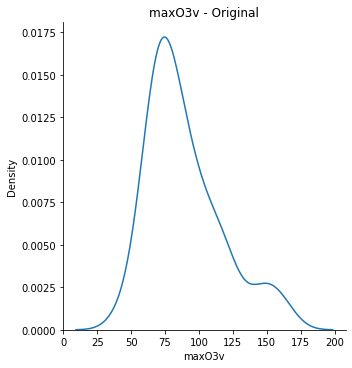

In [40]:
sns.displot(data, x="maxO3v", kind="kde").set(title='maxO3v - Imputed')
sns.displot(orginal_data, x="maxO3v", kind="kde").set(title='maxO3v - Original')
plt.show()